# Introduction to NLP and Large Language Models

## Basics of NLP

### Install and setup [spaCy](https://spacy.io/) for basic text processing

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

In [7]:
'''
Install Spacy
'''
!pip install spacy

'''
Install beautifulsoup4
'''
!pip install beautifulsoup4

## For the embeddings analysis section you will need to setup a huggingface account and get an api key

In [190]:

import configparser as cp
config = cp.ConfigParser()
config.read("config.ini")
api_key = config.get("openai", "api_key")


In [208]:
'''
Import spaCy and load the language model
'''
import spacy
from spacy import displacy

'''
Import request library to download Shakespeare's works for nlp processing
'''
import requests

'''
Import BeautifulSoup to parse the html and extract the text of the SHakespear works
'''
from bs4 import BeautifulSoup

''' 
Import pandas to create a dataframe to store the text
'''
import pandas as pd

'''
Import TSNE and matplotlib to visualize the embeddings
'''
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [257]:
'''
Import hugging face transformers and gpt2 tokenizer to create embeddings for the text
Utilize TSNE to plot the embeddings in 2D space and visualize the embeddings similarity
'''
from transformers import (
    pipeline,
    set_seed,
    AutoTokenizer,
    AutoModel,
    AutoConfig,
    AutoModelForCausalLM,
    GPT2LMHeadModel,
)
import numpy as np

1. Create the spacy model we will use to tokenize text
2. Use requests to download the html of the Shakespear Poem "Romeo and Juliet"
3. Create the BeautifulSoup model we will use to extract the Shakespear text from the html
4. Extract only the text from the html

In [54]:
'''
1. Create the spacy model we will use to tokenize text
'''
pipline = ["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"]
nlp = spacy.load("en_core_web_sm")

In [21]:
'''
2. Use requests to download the html of the Shakespear Poem "Romeo and Juliet"
'''
response = requests.get("http://shakespeare.mit.edu/romeo_juliet/full.html")  
html = response.text
print(html[500:1000])

ter">
      <a href="/Shakespeare">Shakespeare homepage</A> 
    | <A href="/romeo_juliet/">Romeo and Juliet</A> 
    | Entire play
</table>

<H3>ACT I</h3>
<h3>PROLOGUE</h3>
<blockquote>
<A NAME=1.0.1>Two households, both alike in dignity,</A><br>
<A NAME=1.0.2>In fair Verona, where we lay our scene,</A><br>
<A NAME=1.0.3>From ancient grudge break to new mutiny,</A><br>
<A NAME=1.0.4>Where civil blood makes civil hands unclean.</A><br>
<A NAME=1.0.5>From forth the fatal loins of these two foes<


In [16]:
'''
3. Create the BeautifulSoup model we will use to extract the Shakespear text from the html
'''
soup = BeautifulSoup(html, "html.parser")

In [28]:
'''
4. Extract only the text from the html
'''
text = soup.get_text().replace("\n", " ")
text[560:1000]

"parents' rage, Which, but their children's end, nought could remove, Is now the two hours' traffic of our stage; The which if you with patient ears attend, What here shall miss, our toil shall strive to mend.  SCENE I. Verona. A public place.  Enter SAMPSON and GREGORY, of the house of Capulet, armed with swords and bucklers  SAMPSON  Gregory, o' my word, we'll not carry coals.  GREGORY  No, for then we should be colliers.  SAMPSON  I m"

In [64]:
doc = nlp(text)


## Tokens

Tokenization is the process of breaking down a piece of text into small units called tokens. A token may be a word, part of a word or just characters like punctuation.

#### spaCy enables you to extract key lingusitic features of the text and tokenizes the text. 

A token is the used unit in NLP task. Token is a category that a string (sequesnce of charac    ters) may be added to on the basis of what sort of tokwnization you wish to perform. For instance: in pre-processing of a textual sentence, you lemmatize and tokenize the strings based on whether they are nouns, verbs, adjectives, or adverbs.

As you can see in the dataframe below, each row of the text column would be represented as a token. 

In [66]:
cols = ("TEXT", "LEMMA", "POS", "TYPE", "STOPWORD", "ALPHA", "STOP")
rows = []
for t in doc:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop, t.is_alpha, t.is_stop]
    rows.append(row)

df = pd.DataFrame(rows, columns=cols)
    
df.head(20)

,TEXT,LEMMA,POS,TYPE,STOPWORD,ALPHA,STOP
0,,,SPACE,space,False,False,False
1,Romeo,Romeo,PROPN,proper noun,False,True,False
2,and,and,CCONJ,coordinating conjunction,True,True,True
3,Juliet,Juliet,PROPN,proper noun,False,True,False
4,:,:,PUNCT,punctuation,False,False,False
5,Entire,entire,ADJ,adjective,False,True,False
6,Play,play,NOUN,noun,False,True,False
7,,,SPACE,space,False,False,False
8,Romeo,Romeo,PROPN,proper noun,False,True,False
9,and,and,CCONJ,coordinating conjunction,True,True,True


#### Common text Processing steps 
 - Remove Stop Words 
 - Remove empty space

In [147]:
tokens = df.loc[(df["STOP"] == False) & (df["ALPHA"] == True), "TEXT"].values
tokens[20:50]

array(['scene', 'ancient', 'grudge', 'break', 'new', 'mutiny', 'civil',
       'blood', 'makes', 'civil', 'hands', 'unclean', 'forth', 'fatal',
       'loins', 'foes', 'pair', 'star', 'lovers', 'life', 'misadventured',
       'piteous', 'overthrows', 'death', 'bury', 'parents', 'strife',
       'fearful', 'passage', 'death'], dtype=object)

Here we have a list of tokens without stopwords and empty space. spaCy may be overkill for this usecase but it is a very well documented library for nlp projects. 

## Embeddings
> Word Embeddings are a method of extracting features out of text so that we can input those features into a machine learning model to work with text data. They try to preserve syntactical and semantic information. The methods such as Bag of Words(BOW), CountVectorizer and  TFIDF rely on the word count in a sentence but do not save any syntactical or semantic information. In these algorithms, the size of the vector is the number of elements in the vocabulary. We can get a sparse matrix if most of the elements are zero. Large input vectors  will mean a huge number of weights which will result in high computation required for training. Word Embeddings give a solution to these problems.

#### Benifts
- To reduce dimensionality
- To use a word to predict the words around it
- Inter word semantics must be captured
  
#### How are Word Embeddings used?
- They are used as input to machine learning models.
- Take the words —-> Give their numeric representation —-> Use in training or inference
- To represent or visualize any underlying patterns of usage in the corpus that was used to train them.

### Convert our **tokens** into Embeddings and work with **embeddings** to understand how they expose bias in language models. 

We will use 2 embedding methods. AutoTokenizer designed for a hugging face lm model and the hugging face api to get similarity embeddings. 

In [129]:
''' 
Example Encoding and decoding of a single word
'''

print('Example 1:  Encoding and decoding of a single word')
word = "love"
encoded = tokenizer.encode(word)
print(encoded)
decoded = tokenizer.decode(encoded)
print(decoded)

print('Example 2:  Encoding and decoding of multiple words')
word = "love is a beautiful thing"
encoded = tokenizer.encode(word)
print(encoded)
decoded = tokenizer.decode(encoded)
print(decoded)


Example 1:  Encoding and decoding of a single word
[23205]
love
Example 2:  Encoding and decoding of multiple words
[23205, 318, 257, 4950, 1517]
love is a beautiful thing


In [139]:
sentences = doc.sents
embeddings = []
labels = []
for s in sentences:
    t = s.text.strip()
    if t != "":
        embeddings.append(tokenizer(s.text, return_tensors="np",padding=True)["input_ids"])
        labels.append(t)

In [138]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")    
# Set the padding token for the tokenizer
tokenizer.pad_token = tokenizer.eos_token 

In [148]:
token_embeddings = list(set(tokens))

In [153]:
token_embeddings[0]

49

Now we have two list:
- **labels**: Contains the text of the sentences that do not contain blank text
- **embeddings**: The encoded sentences into an array/list of embeddings. Number representations of the words reffered to as the input ids

In [140]:
print(labels[1])
print(embeddings[1])

I PROLOGUE  Two households, both alike in dignity, In fair Verona, where we lay our scene, From ancient grudge break to new mutiny, Where civil blood makes civil hands unclean.
[[   40  4810 33462  8924   220  4930 12503    11  1111 12936   287 16247
     11   554  3148  4643  4450    11   810   356  3830   674  3715    11
   3574  6156  1036 12587  2270   284   649  4517  3541    11  6350  3026
   2910  1838  3026  2832  7711   272    13]]


You can also use the tokenizers decode method to revert the embeddings to text 

In [141]:
print(tokenizer.decode(embeddings[1][0]))

I PROLOGUE  Two households, both alike in dignity, In fair Verona, where we lay our scene, From ancient grudge break to new mutiny, Where civil blood makes civil hands unclean.


### Similarity embeddings

In [192]:
model_id = "sentence-transformers/all-mpnet-base-v2"
hf_token = config.get("huggingface", "api_key")
api_url = f"https://api-inference.huggingface.co/pipeline/feature-extraction/{model_id}"
headers = {"Authorization": f"Bearer {hf_token}"}

In [191]:

def query(texts):
    response = requests.post(
        api_url,
        headers=headers,
        json={"inputs": texts, "options": {"wait_for_model": True}},
    )
    return response.json()

In [198]:
token_embeddings = {}
for token in tokens:
    encoded = tokenizer.encode(token)
    token_embeddings[token]=encoded[0]

In [195]:
tokens[0:10]

array(['Romeo', 'Juliet', 'Entire', 'Play', 'Romeo', 'Juliet',
       'Shakespeare', 'homepage', 'Romeo', 'Juliet'], dtype=object)

In [200]:
uni_tokens = list(set(token_embeddings.keys()))

In [205]:
uni_tokens[0:20]

['fashion',
 'Potpan',
 'living',
 'Rest',
 'betwitched',
 'gossips',
 'Queen',
 'meteor',
 'hap',
 'throats',
 'suffer',
 'cousin',
 'shame',
 'posterity',
 'cries',
 'Straining',
 'unmade',
 'church',
 'agile',
 'sacrificed']

In [213]:
embs = query(list(uni_tokens[0:30]))

In [214]:
emb_X = np.array(embs)
emb_y = np.array(uni_tokens[0:30])

We use spaCy to extract sentences into a list and pass the list into the GPT-2 Tokenizer to convert each word (token) into its ID (embedding).

## Analyze Embeddings

Embeddings do come with risk which is the purpose of this project, but below is the risk of bias from OpenAI:

> **Limitations & risks**:
Our embedding models may be unreliable or pose social risks in certain cases, and may cause harm in the absence of mitigations.
Social bias
**Limitation**: The models encode social biases, e.g. via stereotypes or negative sentiment towards certain groups.
We found evidence of bias in our models via running the SEAT (May et al, 2019) and the Winogender (Rudinger et al, 2018) benchmarks. Together, these benchmarks consist of 7 tests that measure whether models contain implicit biases when applied to gendered names, regional names, and some stereotypes.
For example, we found that our models more strongly associate (a) European American names with positive sentiment, when compared to African American names, and (b) negative stereotypes with black women.
These benchmarks are limited in several ways: (a) they may not generalize to your particular use case, and (b) they only test for a very small slice of possible social bias.
These tests are preliminary, and we recommend running tests for your specific use cases. These results should be taken as evidence of the existence of the phenomenon, not a definitive characterization of it for your use case. Please see our usage policies for more details and guidance.


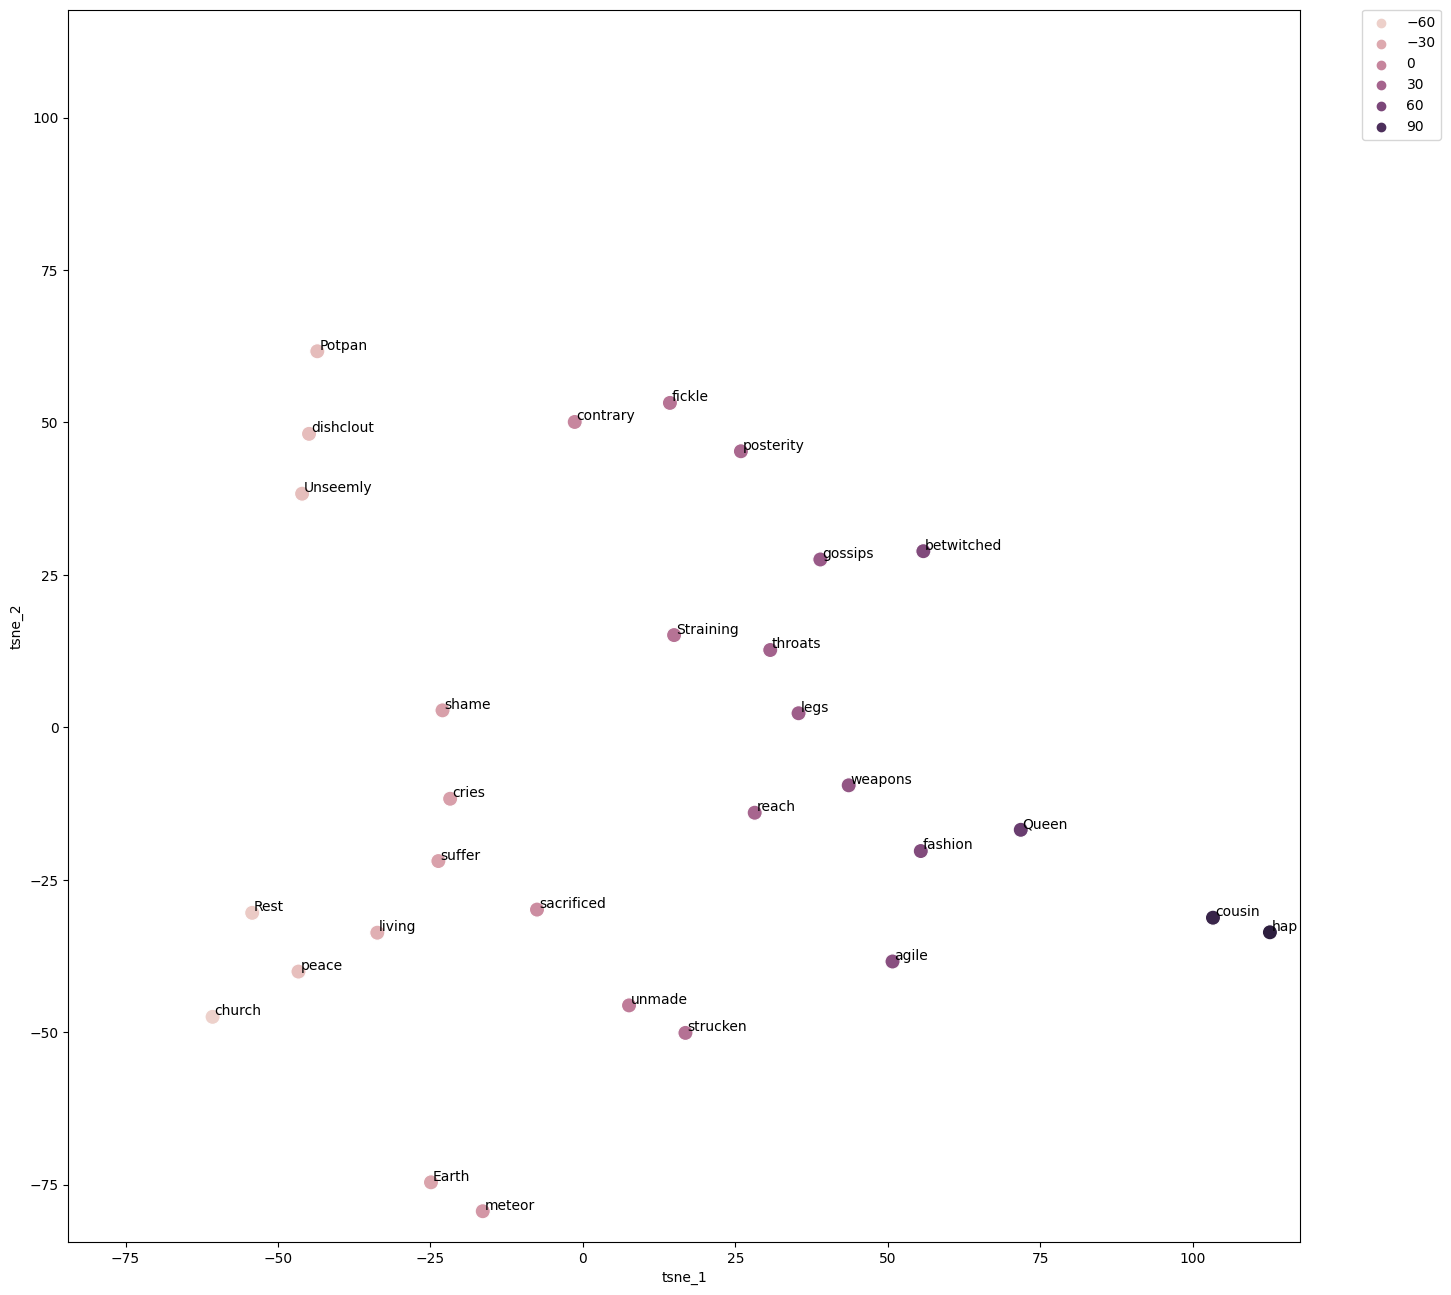

In [221]:

n_components = 2
tsne = TSNE(n_components, perplexity=4)
tsne_result = tsne.fit_transform(emb_X)
tsne_result.shape

# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
plt.rcParams["figure.figsize"] = (20, 16)
tsne_result_df = pd.DataFrame(
    {"tsne_1": tsne_result[:, 0], "tsne_2": tsne_result[:, 1], "label": emb_y}
)
fig, ax = plt.subplots(1)
sns.scatterplot(x="tsne_1", y="tsne_2", hue="tsne_1", data=tsne_result_df, ax=ax, s=120)
lim = (tsne_result.min() - 5, tsne_result.max() + 5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect("equal")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
for i, data in tsne_result_df.iterrows():
    plt.text(x=data.tsne_1 + 0.3, y=data.tsne_2 + 0.3, s=data.label)

### As you can see in the graph above, similar embeddings are clusterd together based on their numerical embeddings


### Now lets look at the embeddidngs of words that may display bias


In [222]:
text = [
    "man",
    "woman",
    "smart",
    "intelligent",
    "brave",
    "ugly",
    "wealthy",
    "thief",
    "criminal",
    "genius",
    "white person",
    "black person",
    "CEO",
    "Nurse",
    "Engineer",
    "Homeless",
    "poverty",
    "violent",
    "rich",
    "poor",
    "healthy",
    "monkey",
    "human",
    "servant",
    "beautiful",
    "strong",
    "Cashier",
    "executive",
    "leader",
    "pleasant",
    "organized",
    "oppressed",
    "hispanic",
    "african",
    "caucasian",
    "asian",
    "difficult",
    "disabled person",
    "sad",
    "happy",
    "family",
    "nurturing",
]

In [225]:
embeddings = query(text)
emb_X = np.array(embeddings)
emb_y = np.array(text)

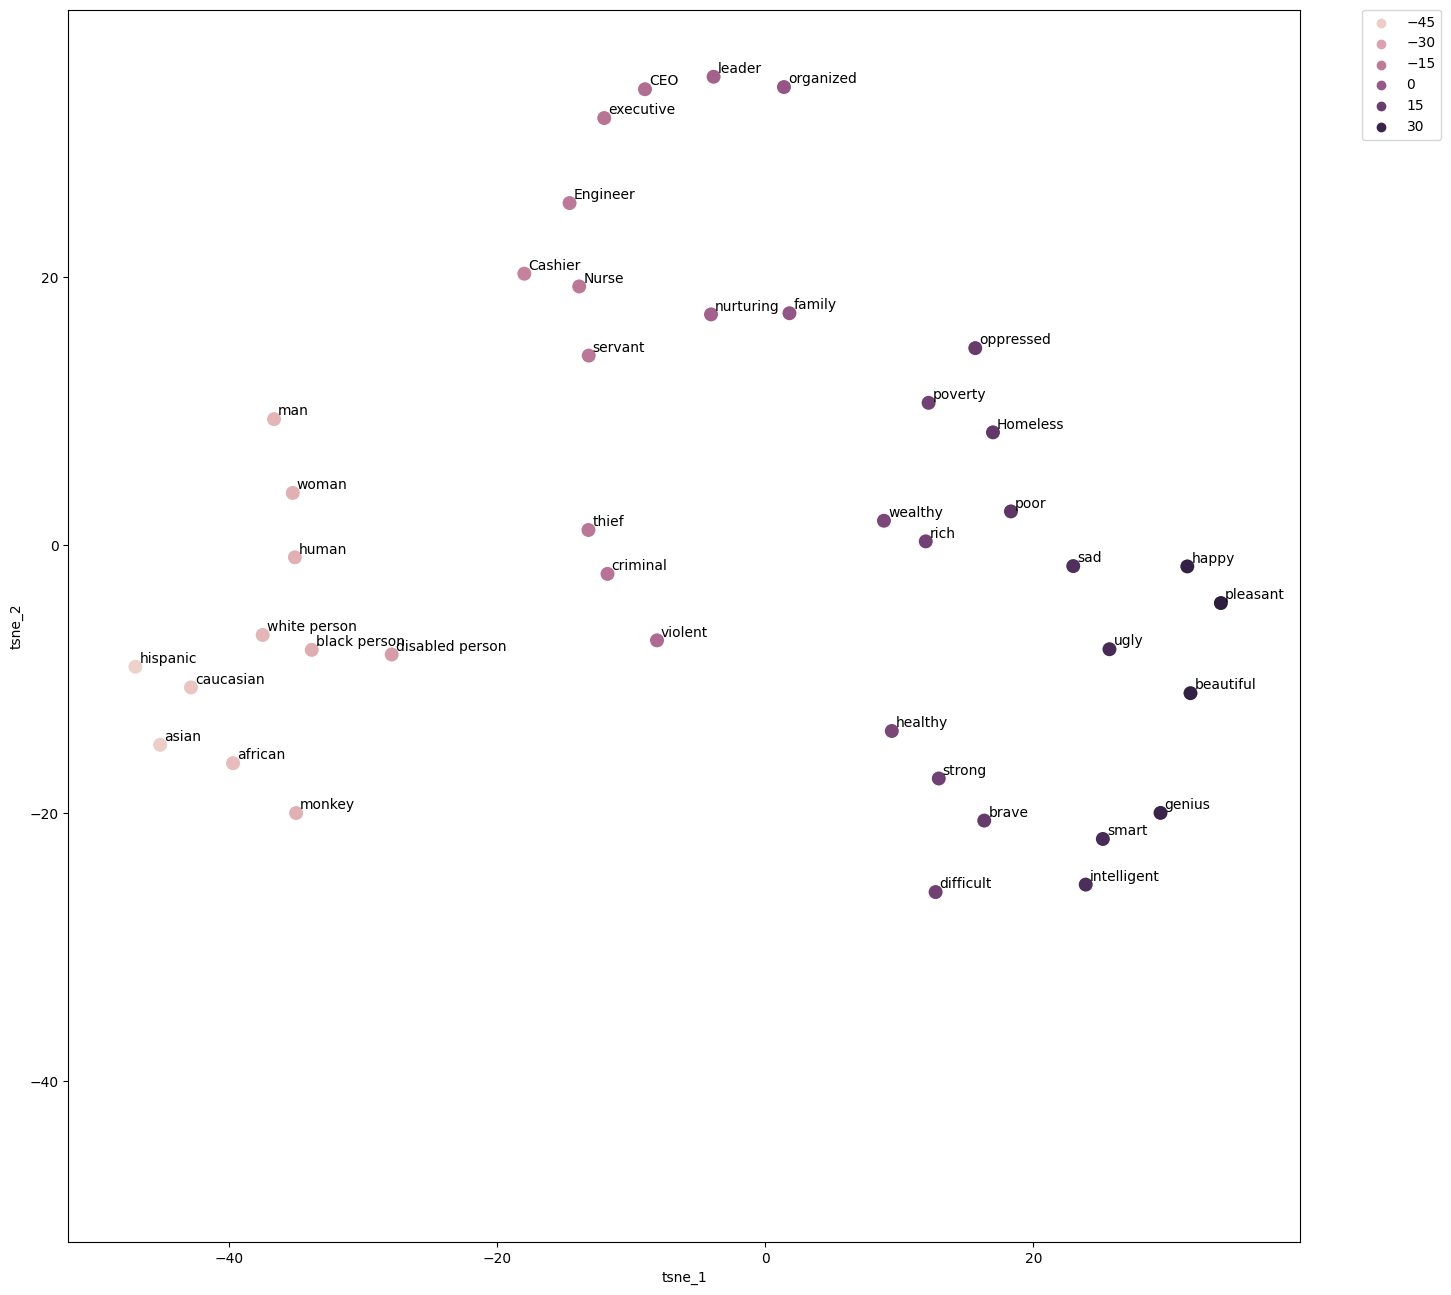

In [226]:

n_components = 2
tsne = TSNE(n_components, perplexity=6)
tsne_result = tsne.fit_transform(emb_X)
tsne_result.shape

# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
plt.rcParams["figure.figsize"] = (20, 16)
tsne_result_df = pd.DataFrame(
    {"tsne_1": tsne_result[:, 0], "tsne_2": tsne_result[:, 1], "label": emb_y}
)
fig, ax = plt.subplots(1)
sns.scatterplot(x="tsne_1", y="tsne_2", hue="tsne_1", data=tsne_result_df, ax=ax, s=120)
lim = (tsne_result.min() - 5, tsne_result.max() + 5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect("equal")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
for i, data in tsne_result_df.iterrows():
    plt.text(x=data.tsne_1 + 0.3, y=data.tsne_2 + 0.3, s=data.label)

## Can you identify any bias in the word embeddings?

#### Does Monkey apear to be closer to a specific ethnic group, how about violent or criminal?

## We can also use cosine similarity to identify bias

In [227]:
emb_dict = dict(zip(text, embeddings))


In [232]:
dist1 = np.linalg.norm(
    np.array(emb_dict["black person"]) - np.array(emb_dict["violent"])
)
dist1

1.191962820740868

In [233]:
dist2 = np.linalg.norm(
    np.array(emb_dict["white person"]) - np.array(emb_dict["violent"])
)
dist2

1.214297191892197

In [234]:
print("Distance between black person and violent: ", dist1)
print("Distance between white person and violent: ", dist2)
print("Difference: ", dist1 - dist2)

Distance between black person and violent:  1.191962820740868
Distance between white person and violent:  1.214297191892197
Difference:  -0.02233437115132908


This small difference can be the result of a LLM choosing violent for the next word when talking about a black person vs a white person.

# Trained Model on a corputs of text from Dr. Williams 

### In this section we will explore training a model from [🤗 Transformers](https://github.com/huggingface/transformers) for text generation

## The Model

I have already collected a corpus of text which includes literature and tweets from Dr. Williams. This corpus has been formatted specifically for a particular model that you are using.

To simplify the process, you can use the corpus file directly with the model without any further preprocessing. The model is specifically designed to work with this particular corpus file. However, if you need to use a different corpus, you may need to modify the model accordingly.

The necessary work of collecting and formatting the corpus is complete, so you can proceed to use it with the model without any additional preprocessing.

### Key Terms

- **Epoch**
  - An epoch in training transformers from Hugging Face refers to one complete iteration through the entire training dataset using a specific set of hyperparameters. During each epoch, the model updates its internal weights and biases based on the training data and the optimization algorithm used. The number of epochs is an important hyperparameter that can affect model performance and needs to be balanced with other hyperparameters to achieve the best results.
- **Embedding**
  - An embedding is a numerical representation of a piece of information, for example, text, documents, images, audio, etc. The representation captures the semantic meaning of what is being embedded, making it robust for many industry applications.
- **Dataset**
  - Datasets is a library for easily accessing and sharing datasets for Audio, Computer Vision, and Natural Language Processing (NLP) tasks.
    - train: this is used for training your model. 
    - validation: this is used for validating the model hyperparameters. 
    - test: this is used for evaluating your model.
- **Model**
  - A Hugging Face model is simply a machine learning (or AI) project that uses a framework provided by the Hugging Face community. Many of these models are ready-to-go and can be used right away, largely within the PyTorch framework.
- **Token**
  - In machine learning, a tensor is a multi-dimensional array of numerical data that is used to represent the input and output data in a machine learning model. Tensors can have any number of dimensions, also known as axes or ranks. For example, a one-dimensional tensor is a vector, a two-dimensional tensor is a matrix, and a three-dimensional tensor is a cube. Higher dimensional tensors can represent more complex data structures, such as images or videos.
- **DataCollector**
  - Data collators are objects that will form a batch by using a list of dataset elements as input. These elements are of the same type as the elements of train_dataset or eval_dataset.
- **Trainer**
  - The Trainer class provides an API for feature-complete training in PyTorch for most standard use cases. It’s used in most of the example scripts.
- **Learning Rate**
  - In machine learning, the learning rate is a hyperparameter that determines how quickly a model learns from the training data. It controls the step size that the optimizer takes during each iteration of training. The learning rate is a scalar value that is usually set between 0.0 and 1.0, and is typically adjusted during the training process to find the optimal value that results in the best model performance.
- **Optimizer**
  - The optimizer is an algorithm that is used to update the model's weights and biases during training. It is responsible for minimizing the loss function that measures the difference between the predicted outputs of the model and the true labels in the training data.There are several types of optimizers, including stochastic gradient descent (SGD), Adam, RMSProp, and Adagrad, among others. Each optimizer has its own set of hyperparameters that can be adjusted to achieve the best model performance.

### Adam Optimizer

Adam (short for Adaptive Moment Estimation) is a popular optimization algorithm used in machine learning to update the weights and biases of a model during training.  The Adam optimizer combines the advantages of two other popular optimization algorithms, Adagrad and RMSprop, to provide a robust and efficient method for gradient descent optimization. It uses both the first and second moments of the gradients to adaptively adjust the learning rate during training.

In simple terms, the Adam optimizer adjusts the learning rate based on the gradient of the loss function and the rate at which the gradients change over time. This helps the optimizer converge faster to the optimal solution and avoid getting stuck in local minima. The Adam optimizer is a powerful optimization algorithm that is widely used in deep learning for its ability to efficiently train complex models with large datasets.

Adam optimizer is commonly used in training transformers and word embeddings models due to its efficiency in handling large datasets and complex models. Transformers and word embeddings are examples of deep learning models that have a large number of parameters that need to be updated during training. These models require a powerful optimization algorithm that can effectively update the weights and biases of the model to minimize the loss function and improve the model's performance. It provides several advantages that make it an ideal choice for training these types of models. It uses adaptive learning rates that are based on the estimated first and second moments of the gradients. This helps to overcome the challenges of learning rate tuning, which can be a time-consuming and challenging task. Also, Adam optimizer is known to perform well in handling sparse gradients, which are common in transformers and word embeddings models. It also has the ability to efficiently handle large datasets, which is important when training these models on massive amounts of text data.

The Adam optimizer is an effective and efficient optimization algorithm that is commonly used in training transformers and word embeddings models due to its ability to handle the large, complex, and sparse models commonly encountered in natural language processing.

In [248]:

from random import  sample

import torch
from torch.nn import functional as F
from torch.utils.data import Dataset
from transformers import (
    DataCollatorForLanguageModeling,
    GPT2LMHeadModel,
    GPT2Tokenizer,
    Trainer,
    TrainingArguments
)


''' 
Define the dataset class which will be used to load the data into the model by processing the corpus.
'''

class TextDataset(Dataset):
    def __init__(self, text_file, block_size=256):
        self.tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

        self.block_size = block_size
        self.pad = self.tokenizer.encode(self.tokenizer.eos_token)[0]
        self.data = {"train": [], "validation": []}
        self.data["train"] = self.generate_dateset(text_file)
        self.data["validation"] = self.generate_dateset(text_file, eval=True, split=0.1)

    def generate_dateset(self, text_file, eval=False, split=0.1):
        data = []
        with open(text_file, "r", encoding="utf-8") as f:
            text = f.read().split("<BREAK>")
            if eval:
                text = sample(text, int(len(text) * split))

        input_ids = []
        attention_mask = []
        for t in text:
            input_ids.extend(self.tokenizer.encode(t))
            attention_mask.extend([1 for i in range(len(input_ids))])
        input_ids = self.pad_list(input_ids)
        attention_mask = self.pad_list(attention_mask)
        id_chunks = list(self.chunks(input_ids, self.block_size))
        attm_chunks = list(self.chunks(attention_mask, self.block_size))

        for id, mask in zip(id_chunks, attm_chunks):
            data.append(
                {
                    "input_ids": torch.tensor(id),
                    "attention_mask": torch.tensor(mask),
                    "labels": torch.tensor(id.copy()),
                }
            )
        return data

    def pad_list(self, input_ids):
        padding = self.block_size - (len(input_ids) % self.block_size)
        _ = [input_ids.append(self.pad) for _ in range(padding)]
        return input_ids

    def chunks(self, lst, n):
        """Yield successive n-sized chunks from lst."""
        for i in range(0, len(lst), n):
            yield lst[i : i + n]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]


def group_texts(examples, block_size=512):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, we could add padding if the model supported it instead of this drop, you can
    # customize this part to your needs.
    total_length = (total_length // block_size) * block_size
    # Split by chunks of max_len.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

'''
Define a method to train the model and save the results into checkpoints.
'''

def train_lm(resume_from_checkpoint=False, corpus_file="corpus.txt", num_epochs=5):
    # Create Tokenizer and Model objects
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    tokenizer.pad_token = tokenizer.eos_token
    # Initialize model
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    block_size = 512
    dataset = TextDataset(corpus_file, block_size=block_size)
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-8)

    train_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

    torch.cuda.empty_cache()

    model_checkpoint = "ethical"
    model_name = model_checkpoint.split("/")[-1]
    training_args = TrainingArguments(
        f"{model_name}-finetuned-gpt2",
        evaluation_strategy="epoch",
        learning_rate=1e-5,
        weight_decay=0.01,
        per_device_train_batch_size=1,
        per_device_eval_batch_size=1,
        num_train_epochs=num_epochs,
        logging_dir="./logs",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=dataset["train"],
        eval_dataset=dataset["validation"],
        data_collator=train_collator,
        optimizers=(optimizer, None),
    )

    trainer.train(resume_from_checkpoint=resume_from_checkpoint)

In [ ]:
'''
Change to the source directory to run the code.
./src
'''

import os

new_root_dir = './src'
os.chdir(new_root_dir)

### This may take a while depending on your CPU/GPU

In [247]:
''' 
Train the model
set resume_from_checkpoint=True to resume training from the last checkpoint else set it to False to start training from scratch.
Pass the path of the corpus file to the train_lm method with the parameter corpus_file.
'''
train_lm(resume_from_checkpoint=True,num_epochs=3)


  0%|          | 0/4785 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

{'eval_loss': 3.2647104263305664, 'eval_runtime': 0.8745, 'eval_samples_per_second': 36.591, 'eval_steps_per_second': 36.591, 'epoch': 15.0}
{'train_runtime': 35.4992, 'train_samples_per_second': 134.792, 'train_steps_per_second': 134.792, 'train_loss': 0.19139156839815177, 'epoch': 15.0}


### Text Generation with our fine tuned model **EthicalGPT**

In [259]:
''' 
Load the model from the checkpoint.
'''
model = GPT2LMHeadModel.from_pretrained("ethical-finetuned-gpt2\checkpoint-4500")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
generator = pipeline('text-generation', model=model, tokenizer=tokenizer)
set_seed(99)

In [254]:
'''
Create a sentence with the seed text and generate the next 50 words.
'''
sentence = "Artificial Intelligence impacts the society"

In [255]:
''' 
Tokebnize the sentence and convert it into a tensor.
'''
input = tokenizer.encode(sentence, return_tensors="pt")


In [260]:
generator(sentence, max_length=50, num_return_sequences=5)

C:\Users\Travis Weston\AppData\Roaming\Python\Python39\site-packages\transformers\generation\utils.py:1201: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Artificial Intelligence impacts the society we live in," said Dr. James T. Wilson, a neurobiologist at the Keck Center for AI and Society at the University of Florida, who co-authored the paper. "I think the potential cost'},
 {'generated_text': 'Artificial Intelligence impacts the society and the lives of billions of people. The technology is going to make a bad world and every single one of those  bad  worlds are going to have AI solutions to their        “'},
 {'generated_text': 'Artificial Intelligence impacts the society, not just in the ways that it is applied. For instance, AI-focused healthcare providers may not be able to accurately assess whether patients who have been exposed to hazardous chemicals or drugs need biotronic imaging (B'},
 {'generated_text': "Artificial Intelligence impacts the society's priorities and interests to the point of being a violation of human rights. There are a great deal of human rights and ethical concerns that are being foug

# Results

After fine-tuning GPT-2 on Dr. Williams' text corpus, the model's responses closely resembled Dr. Williams' writing style and content. By comparing Our FineTuned GPT-2's response to another text generation model's output on a prompt about artificial intelligence, we were able to highlight the potential risk of bias in large language models that can arise from their training datasets. Our discussion on embeddings provided further context on how such bias can manifest in model prompts, leading to false narratives and harmful outcomes.

Response From External Model:
> Artificial intelligence has a significant impact on society, ranging from improvements in healthcare and transportation to concerns around job displacement and privacy. As AI continues to evolve and become more integrated into our lives, it is essential to carefully consider its potential benefits and risks.
